#### 【 지도학습 - 회귀 】
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예 : 거리, 시간, 무게, 집가격 등등 ...
- 주제 : 공부시간에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## ================================================
## [1-1] 모듈 로딩
## ================================================
## 기본 모듈
import pandas as pd
import numpy as np

## 시각화 관련 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 데이터셋 및 확습관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## CoW 활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [2]:
## ================================================
## [1-2] 데이터 준비 및 확인
## ================================================
## 데이터 준비
hour =  [1,   2,  3,  5,  7,  8, 10]
score = [15, 32, 45, 55, 60, 73, 91]

## 공부시간과 성적 데이터 셋
dataDF = pd.DataFrame({'Hour':hour, 'Score':score})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Score   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


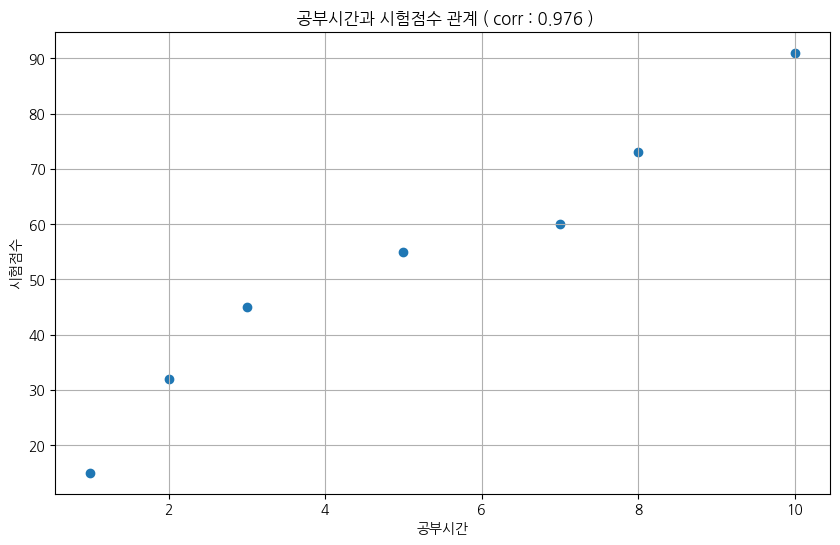

In [5]:
## =========================================================
## 공부시간과 성적 관계 시각화 => Linear Model로써
##                            피쳐와 타겟 선형 관계성
## =========================================================
## => 상관계수 계산 : [기] person -> 피쳐와 타겟의 직선의 선형성
corr_      = dataDF.corr(numeric_only=True)['Score']
corr_value = corr_['Hour']

## => 시각화
plt.figure(figsize=(10, 6))
plt.scatter(dataDF.Hour, dataDF.Score)
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f" 공부시간과 시험점수 관계 ( corr : {corr_value:.3f} )")
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리<hr>

In [ ]:
## [2-1] 피쳐(2D)와 타겟(1D) 분리

featureDF = dataDF[dataDF.columns[0:1]]    ## dataDF[ ['Hour'] ]
targetSR  = dataDF[dataDF.columns[-1]]       ## dataDF[  'Score'  ]

print(f'featureDF : {featureDF.shape} {featureDF.ndim}D , targetSR : {targetSR.shape} {targetSR.ndim}D')

featureDF : (7, 1) 2D , targetSR : (7,) 1D


In [13]:
## [2-2] 학습용과 테스트용 분리 : 회귀 시에는 stratify 필요없음
##                             분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=10)
print(f'[TRAIN] x_train : {x_train.shape},  y_train : {y_train.shape}')
print(f'[TEST]  x_test  : {x_test.shape},   y_test  : {y_test.shape}')

[TRAIN] x_train : (5, 1),  y_train : (5,)
[TEST]  x_test  : (2, 1),   y_test  : (2,)


[3] 학습 진행 <hr>

In [14]:
## 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## 학습 진행 => 학습용 데이터셋만 사용 ==> y = 공부시간*W1 + W0
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_
print( '가중치 coef_        :',   lrModel.coef_)
print( '절  편 intercept    :',   lrModel.intercept_)
print( 'feature_names_in_  :',   lrModel.feature_names_in_)
print( 'n_features_in_     :',   lrModel.n_features_in_)

print( '선형식 즉, 모델 : ', f'시험점수 = {lrModel.coef[0]}*공부시간 + {lrModel.intercept_}')

가중치 coef_        : [1.]
절  편 intercept    : -8.881784197001252e-16
feature_names_in_  : ['Hour']
n_features_in_     : 1


[4] 성능평가 <hr>

In [ ]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
train_score =  dtModel.score( x_train, y_train )
test_score  =  dtModel.score( x_test, y_test )

print(f'[train_score] {train_score} ')
print(f'[test_score]  {test_score} ')

[train_score] 0.9999759296111327 
[test_score] 0.9600232003809173 


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운 피쳐) ==> 예측 무게 값
- n_neighbros의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

In [14]:
newDF = pd.DataFrame( [[20], [3], [45], [60], [99], [400]] , columns=dataDF.columns[1:-1] )
newDF

,Length
0,20
1,3
2,45
3,60
4,99
5,400


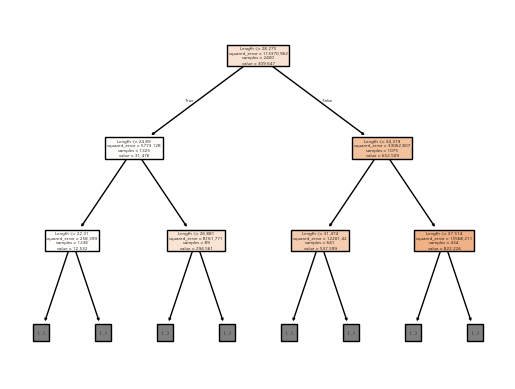

In [17]:
## DT의 그래프 시각화
from sklearn.tree import plot_tree


plot_tree(dtModel,
          feature_names=x_train.columns[0:1],
          class_names=[y_train.name],
          max_depth=2,
          filled=True)
plt.show()

In [ ]:
## 예측값 추출
pre_weights = dtModel.predict(newDF)
print(f'[pre_weights] {pre_weights}')

## 값을 예측한 경로
dtModel.decision_path(newDF).todense().tolist()

[pre_weights] [  18.924735    0.075366 1019.842845 1331.508758 1331.508758 1331.508758]


matrix([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1]], shape=(6, 4797))

In [107]:
print( x_train.iloc[[0, 1]], end='\n\n')      ## DF => 위치인덱스
print( x_train.loc[[10092, 87]], end='\n\n')  ## DF => 라벨인덱스
print( y_train.iloc[0], y_train.loc[10092], y_train[10092])

print('------------------------')
print('\nx_train.index', x_train.index, sep='\n')
print('\ny_train.index', y_train.index, sep='\n')

          Length
10092   9.833504
87     37.248502

          Length
10092   9.833504
87     37.248502

2.6021465214897748 2.6021465214897748 2.6021465214897748
------------------------

x_train.index
Index([10092,    87,   729,  1065,  9498,   599,  9979,  9423,  9281, 10456,
       ...
        1032,  9542,  9449,  9020,   733,  9509,  1180,  1344,   527,  1289],
      dtype='int64', length=2400)

y_train.index
Index([10092,    87,   729,  1065,  9498,   599,  9979,  9423,  9281, 10456,
       ...
        1032,  9542,  9449,  9020,   733,  9509,  1180,  1344,   527,  1289],
      dtype='int64', length=2400)


[0] pre_weights :   57.11033        calc :   57.11033
[1] pre_weights :    0.42887        calc :    0.42887
[2] pre_weights : 1145.49170        calc : 1145.49170
[3] pre_weights : 1145.49170        calc : 1145.49170
[4] pre_weights : 1145.49170        calc : 1145.49170
[5] pre_weights : 1145.49170        calc : 1145.49170


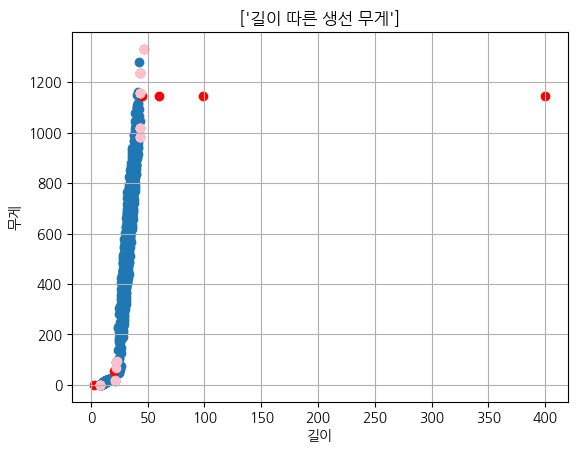

In [112]:
## ==========================
## n_neighbors 시각화
## ==========================
plt.scatter(x_train, y_train)


for idx in range(newDF.shape[0]):
    # 최근접 이웃 인덱스 5개
    n_idx = indices[idx].tolist()

    plt.scatter(newDF.iloc[idx],     pre_weights[idx], c='red')
    plt.scatter(x_train.iloc[n_idx], y_train.iloc[n_idx], c='pink')
    
    print(f'[{idx}] pre_weights : {pre_weights[idx]:10.5f}', end='')
    print(f'        calc : {y_train.iloc[n_idx].sum()/5:10.5f}')

plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title([f"길이 따른 생선 무게"])
plt.show()